In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [3]:
import sys
sys.path.append("../../")
import torchvision
import torch
import time
import numpy as np
from PIL import Image
from torchvision import transforms
import cv2
from matplotlib import pyplot as plt

from utils_cv.detection.data import get_coco_labels
from utils_cv.detection.plot import display_bounding_boxes
from utils_cv.detection.model import get_bounding_boxes

In [4]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Inference

In [5]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O car.jpg

--2019-08-02 22:45:16--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.248.155
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.248.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2305852 (2.2M) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]   2.20M  --.-KB/s    in 0.04s   

2019-08-02 22:45:16 (59.6 MB/s) - ‘car.jpg’ saved [2305852/2305852]



In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# select image
im_path = "./car.jpg"
im = Image.open(im_path)

# Defing PyTorch Transform
transform = transforms.Compose([transforms.ToTensor()])

# Apply the transform to the image
im = transform(im)  # .cuda()

model.eval()  # set eval mode
with torch.no_grad():
    start = time.time()
    pred = model([im])
    print(f"Time spend: {time.time() - start}")

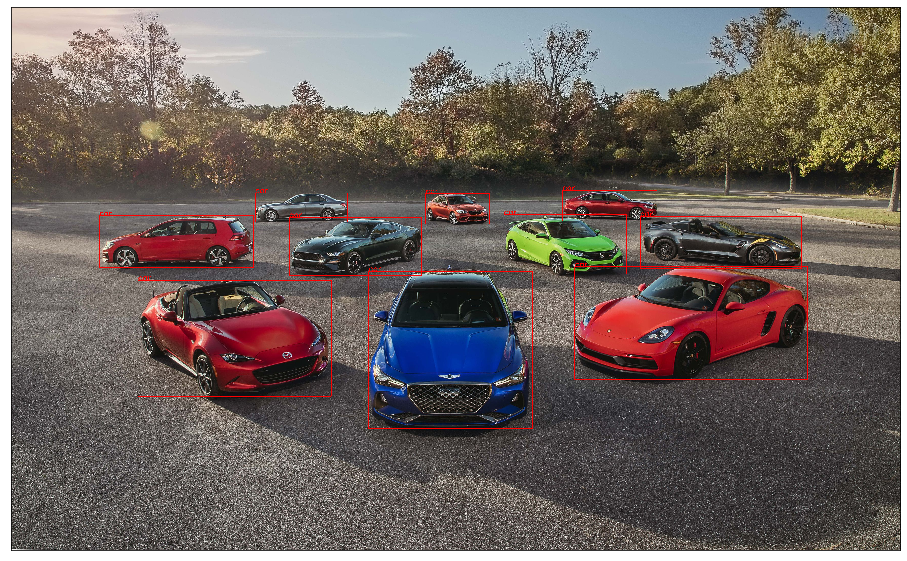

In [16]:
pred_labels, pred_boxes = get_bounding_boxes(pred)
display_bounding_boxes(im_path, pred_boxes, pred_labels, get_coco_labels(), figsize=(16, 10))